Enter the path to the shapefile (.shp):  C:\Users\avakbal\Desktop\Scripts\0_Codes\Create_Buffer\Data


Spatial Coordinate System:
PROJCS["WGS_1984_UTM_Zone_37N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",39],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["Meter",1],AXIS["Easting",EAST],AXIS["Northing",NORTH]]

Attribute Table:
      Name           Z              X             Y  \
0  Point-1  785.229519  203786.095589  3.205844e+06   
1  Point-2  786.000000  203667.043822  3.205822e+06   
2  Point-3  787.000000  203701.175141  3.205977e+06   
3  Point-4  788.000000  203908.873473  3.205938e+06   
4  Point-5  789.000000  203836.377494  3.205750e+06   

                         geometry  
0  POINT (203786.096 3205843.829)  
1  POINT (203636.096 3205843.829)  
2  POINT (203786.096 3205993.829)  
3  POINT


Enter buffer distance in meters:  100
Enter the output folder path:  C:\Users\avakbal\Desktop\Scripts\0_Codes\Create_Buffer



Buffered shapefile saved at: C:\Users\avakbal\Desktop\Scripts\0_Codes\Create_Buffer\Data_buffer_100.0_m.shp
Plot saved as: C:\Users\avakbal\Desktop\Scripts\0_Codes\Create_Buffer\Data_buffer_100.0_m_plot.jpg


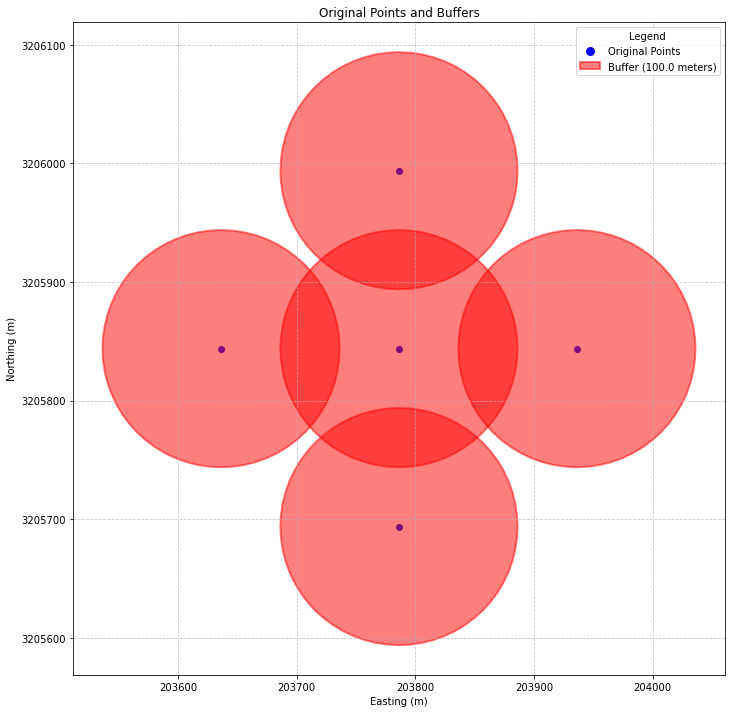

In [1]:
import geopandas as gpd
import os
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import contextily as ctx

def main():
    # Input shapefile path
    input_shapefile_path = input("Enter the path to the shapefile (.shp): ")

    # Read the shapefile
    gdf = gpd.read_file(input_shapefile_path)

    # Print spatial coordinate system
    print("Spatial Coordinate System:")
    print(gdf.crs)

    # Print attribute table
    print("\nAttribute Table:")
    print(gdf)

    # Ask for buffer distance in meters
    buffer_distance = float(input("\nEnter buffer distance in meters: "))

    # Create buffer GeoDataFrame
    buffer_gdf = gdf.copy()
    buffer_gdf['geometry'] = buffer_gdf['geometry'].buffer(buffer_distance)

    # Input output folder
    output_folder = input("Enter the output folder path: ")

    # Create output filename
    input_filename = os.path.splitext(os.path.basename(input_shapefile_path))[0]
    output_filename = f"{input_filename}_buffer_{buffer_distance}_m.shp"
    output_path = os.path.join(output_folder, output_filename)

    # Save the buffered shapefile
    buffer_gdf.to_file(output_path)

    print(f"\nBuffered shapefile saved at: {output_path}")

    # Plot points and buffer
    plot_points_and_buffer(gdf, buffer_gdf, buffer_distance, output_folder, input_filename)

def plot_points_and_buffer(gdf, buffer_gdf, buffer_distance, output_folder, input_filename):
    # Increase the figure size
    fig, ax = plt.subplots(figsize=(16, 12))

    # Plot the original points
    gdf.plot(ax=ax, marker='o', color='blue', label='Original Points')

    # Plot the buffer with filled polygons
    buffer_gdf.plot(ax=ax, facecolor='red', edgecolor='red', alpha=0.5, linewidth=2)

    # Create legend manually
    legend_elements = [
        Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Original Points'),
        Patch(facecolor='red', edgecolor='red', alpha=0.5, linewidth=2, label=f'Buffer ({buffer_distance} meters)')
    ]

    # Set plot title and legend
    plt.title('Original Points and Buffers')
    ax.legend(handles=legend_elements, title="Legend")

    # Set axis labels
    plt.xlabel('Easting (m)')
    plt.ylabel('Northing (m)')

    # Add Esri satellite basemap with a specific zoom level (adjust as needed)
    #ctx.add_basemap(ax, source=ctx.providers.Esri.WorldImagery, zoom=16)

    # Add grid lines
    ax.grid(True, linestyle='--', alpha=0.7)

    # Save the plot as a high-resolution JPEG file in the same folder
    plot_filename = f"{input_filename}_buffer_{buffer_distance}_m_plot.jpg"
    plot_path = os.path.join(output_folder, plot_filename)
    plt.ticklabel_format(useOffset=False, style='plain')  # Disable scientific notation
    plt.savefig(plot_path, dpi=300)  # Set resolution to 300 DPI for HD
    print(f"Plot saved as: {plot_path}")

    # Show the plot
    plt.show()

if __name__ == "__main__":
    main()
